In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import Dense
import keras_tuner as kf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
df=pd.read_csv(r'F:\datasets\forestfires (1).csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [3]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
df.drop(columns=['month','day'],inplace=True)

In [7]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

# Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

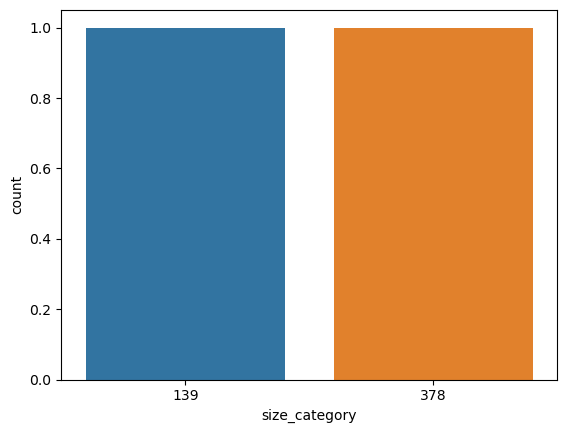

In [8]:
sns.countplot(df['size_category'].value_counts())

# Transformation

In [9]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
y=le.fit_transform(df['size_category'])

In [10]:
x=df.iloc[:,:-1]


In [11]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)


# Model building

In [14]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [15]:
ann=Sequential()

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=350,callbacks=[early])

Epoch 1/350
13/13 [==============================] - 1s 16ms/step - loss: 1.1028 - val_loss: 1.0925
Epoch 2/350
13/13 [==============================] - 0s 3ms/step - loss: 1.0370 - val_loss: 1.0315
Epoch 3/350
13/13 [==============================] - 0s 4ms/step - loss: 0.9809 - val_loss: 0.9782
Epoch 4/350
13/13 [==============================] - 0s 4ms/step - loss: 0.9319 - val_loss: 0.9308
Epoch 5/350
13/13 [==============================] - 0s 3ms/step - loss: 0.8870 - val_loss: 0.8868
Epoch 6/350
13/13 [==============================] - 0s 3ms/step - loss: 0.8480 - val_loss: 0.8507
Epoch 7/350
13/13 [==============================] - 0s 3ms/step - loss: 0.8139 - val_loss: 0.8186
Epoch 8/350
13/13 [==============================] - 0s 3ms/step - loss: 0.7830 - val_loss: 0.7917
Epoch 9/350
13/13 [==============================] - 0s 3ms/step - loss: 0.7574 - val_loss: 0.7674
Epoch 10/350
13/13 [==============================] - 0s 3ms/step - loss: 0.7328 - val_loss: 0.7453
Epoch 11

<AxesSubplot:>

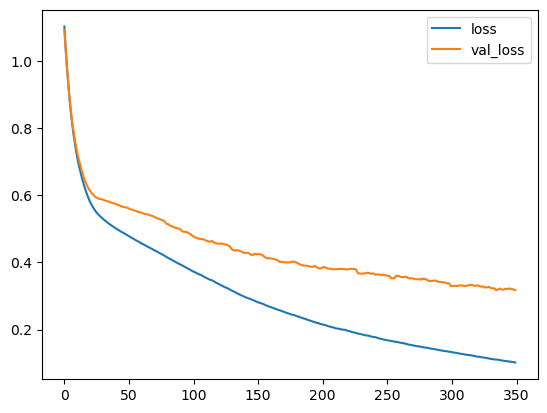

In [16]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [17]:
ypred=ann.predict(xtest)


5/5 [==============================] - 0s 4ms/step


In [18]:
ypred=ypred>0.5

In [19]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77        36
           1       0.88      0.98      0.93        94

    accuracy                           0.89       130
   macro avg       0.90      0.82      0.85       130
weighted avg       0.90      0.89      0.89       130



# Hyperparameter Tunning

In [20]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):
        if counter ==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),
                            input_dim = 28))
    else:
        model.add(Dense(
              hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid'])))
    counter+=1
    model.add(Dense(units = 1,activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy',metrics = 'accuracy')
    return model

In [21]:
tunner=kf.RandomSearch(hyper,objective='val_accuracy',max_trials=3)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [22]:
tunner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

INFO:tensorflow:Oracle triggered exit


In [23]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 72,
 'activation0': 'sigmoid',
 'optimizer': 'rmsprop',
 'units1': 64,
 'activation1': 'tanh',
 'units2': 88,
 'activation2': 'relu',
 'units3': 88,
 'activation3': 'tanh',
 'units4': 120,
 'activation4': 'relu',
 'units5': 56,
 'activation5': 'sigmoid',
 'units6': 72,
 'activation6': 'sigmoid',
 'units7': 32,
 'activation7': 'sigmoid',
 'units8': 112,
 'activation8': 'sigmoid',
 'units9': 40,
 'activation9': 'relu'}

In [24]:
x.shape

(517, 28)

In [29]:
model = tunner.get_best_models(num_models=1)[0]
model.build(x.shape)
model.summary()

ValueError: Received incompatible tensor with shape (13, 72) when attempting to restore variable with shape (28, 72) and name dense/kernel:0.

In [ ]:
model.fit(xtrain,ytrain,epochs = 100)

In [ ]:
model.evaluate(xtest,ytest)

In [ ]:
ypred=model.predict(xtest)
ypred

In [ ]:
ypred=ypred>0.5
ypred=pd.DataFrame(ypred)

In [ ]:
ypred=ypred.replace({True:'Small',False:'Large'})
ypred

In [ ]:
sns.countplot(ypred.value_counts())